# Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
p3=pd.read_excel('P3- Churn-Modelling Data.xlsx')
p3.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
p3.shape

(10000, 14)

In [4]:
p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
p3['churned'].value_counts()

0    7963
1    2037
Name: churned, dtype: int64

## Customer Demographics:

In [6]:
p3['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [7]:
#defining bins and age groups
bins=[0,18,30,40,50,60,70,80,90]
age_groups=['0-18','19-30','31-40','41-50','51-60','61-70','71-80','81-90']
#creating new column 'age group'
p3['Age Group']=pd.cut(p3['Age'],labels=age_groups,bins=bins, right=False)
p3['num']=1
p3.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Age Group,num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50,1


In [8]:
age_dist=p3.groupby('Age Group')['num'].sum().reset_index()
age_dist

,Age Group,num
0,0-18,0
1,19-30,1641
2,31-40,4346
3,41-50,2618
4,51-60,869
5,61-70,375
6,71-80,136
7,81-90,13


Text(0.5, 1.0, 'Distribution of customers across different age groups')

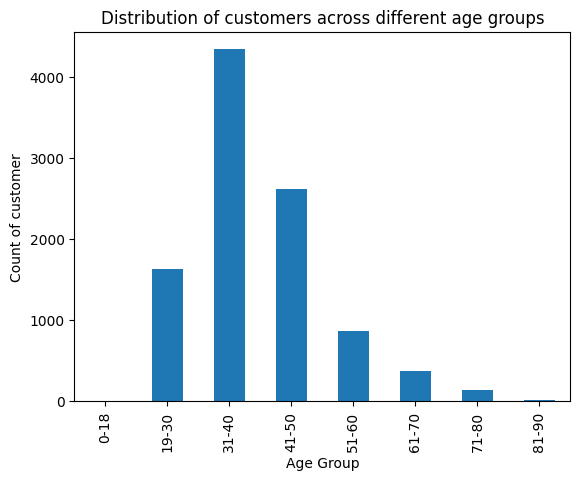

In [9]:
p3['Age Group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count of customer')
plt.title('Distribution of customers across different age groups')

<AxesSubplot: ylabel='Gender'>

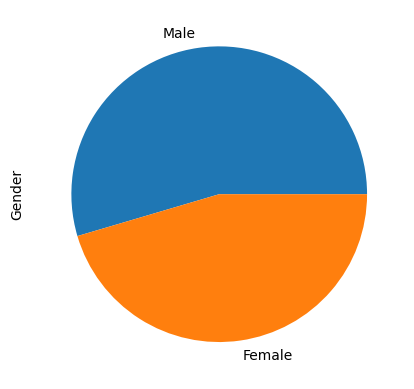

In [10]:
p3['Gender'].value_counts().reset_index()
p3['Gender'].value_counts().plot(kind='pie')

## Churn Analysis:

In [11]:
percent_cust_churned=(((p3['churned'].sum())/(len(p3['churned'])))*100).round(2)
print(f'Percentage of customer churned is {percent_cust_churned}%')

Percentage of customer churned is 20.37%


In [12]:
for num in [1,2,3,4]:
    print(f"percentage of customer churned having number of product = {num} is {((p3[p3['NumOfProducts']==num]['churned'].sum()/p3['churned'].sum())*100).round(2)}")

percentage of customer churned having number of product = 1 is 69.17
percentage of customer churned having number of product = 2 is 17.08
percentage of customer churned having number of product = 3 is 10.8
percentage of customer churned having number of product = 4 is 2.95


In [13]:
#number of customer churned who is not active member
print(f"percentage of customer churned who is not an active member is {((p3[p3['IsActiveMember']==0]['churned'].sum()/p3['churned'].sum())*100).round(2)}")

percentage of customer churned who is not an active member is 63.92


In [14]:
#age wise distribution of customer who are churned
churn_agewise=[]
for i in p3['Age Group'].unique():
    churn_agewise.append(p3[p3['Age Group']==i]['churned'].sum())
print(churn_agewise)

[806, 473, 487, 124, 132, 14, 1, 0]


In [15]:
agewise_churn_df=pd.DataFrame({'Age Group':p3['Age Group'].unique(),'Churn':churn_agewise})

In [16]:
agewise_churn_df.sort_values(by='Age Group')

,Age Group,Churn
3,19-30,124
1,31-40,473
0,41-50,806
2,51-60,487
4,61-70,132
5,71-80,14
6,81-90,1
7,NaN,0


<AxesSubplot: xlabel='Age Group', ylabel='Churn'>

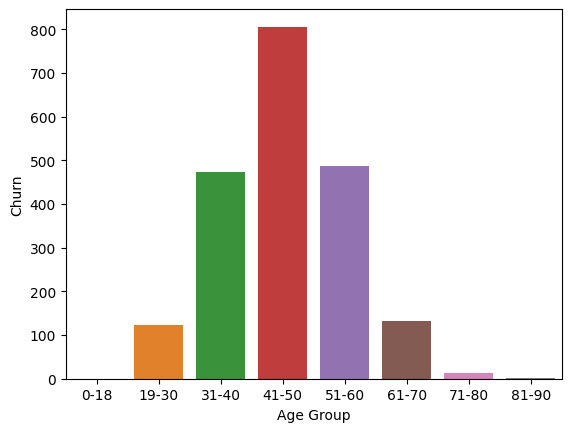

In [17]:
sns.barplot(data=agewise_churn_df,x='Age Group',y='Churn')

<AxesSubplot: ylabel='churned'>

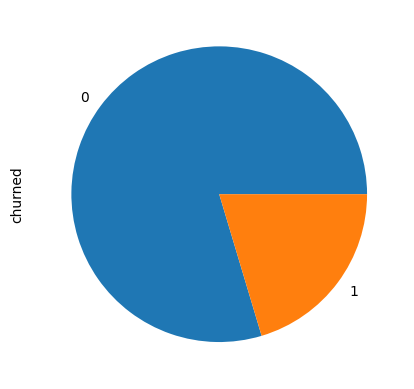

In [18]:
p3['churned'].value_counts().plot(kind='pie')

In [19]:
print(p3['CreditScore'].max(), p3['CreditScore'].min())
p3[p3['CreditScore']>600]['churned'].sum()

850 350


1372

In [20]:
regionwise_churned=[]
for i in p3['Geography'].unique():
    regionwise_churned.append(p3[p3['Geography']==i]['churned'].sum())
print(regionwise_churned)

[810, 413, 814]


<BarContainer object of 3 artists>

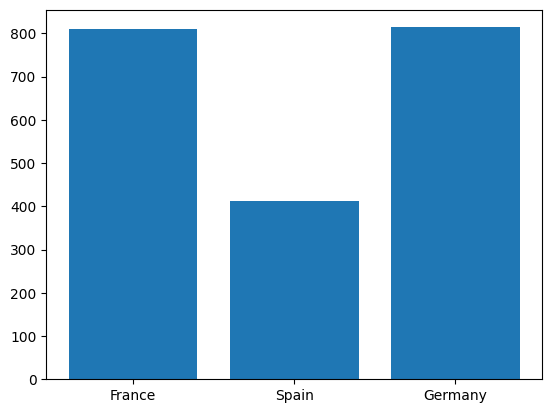

In [21]:
plt.bar(p3['Geography'].unique().tolist(),regionwise_churned)

In [22]:
p3[['CreditScore','Geography','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','churned']].corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_16700\2762038577.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p3[['CreditScore','Geography','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','churned']].corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,churned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.156128
churned,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,1.000000


## Product Usage:

In [23]:
prod_usage=p3['NumOfProducts'].value_counts().reset_index()

Text(0.5, 1.0, 'most commonly used product or services')

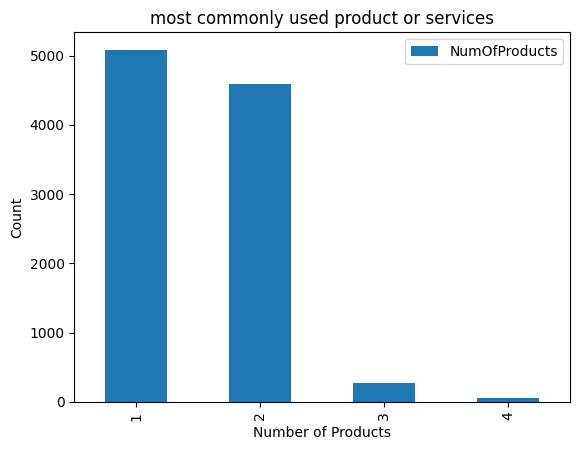

In [24]:
prod_usage.plot(x='index', kind='bar')
plt.ylabel('Count')
plt.xlabel('Number of Products')
plt.title('most commonly used product or services')

In [25]:
p3

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Age Group,num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50,1


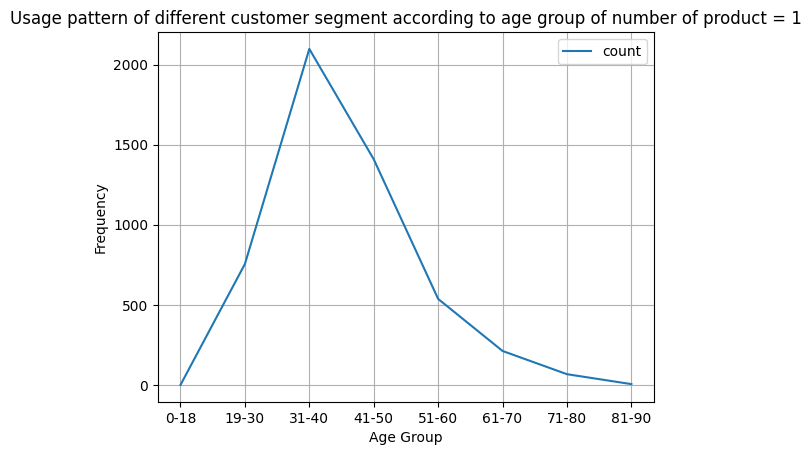

In [26]:
usage1_agewise=p3[p3['NumOfProducts']==1]['Age Group'].value_counts().reset_index().sort_values(by='index')
usage1_agewise.rename(columns={'index':'Age Group','Age Group':'count'},inplace=True)
usage1_agewise.plot(x='Age Group')
plt.ylabel('Frequency')
plt.title('Usage pattern of different customer segment according to age group of number of product = 1')
plt.grid(True)

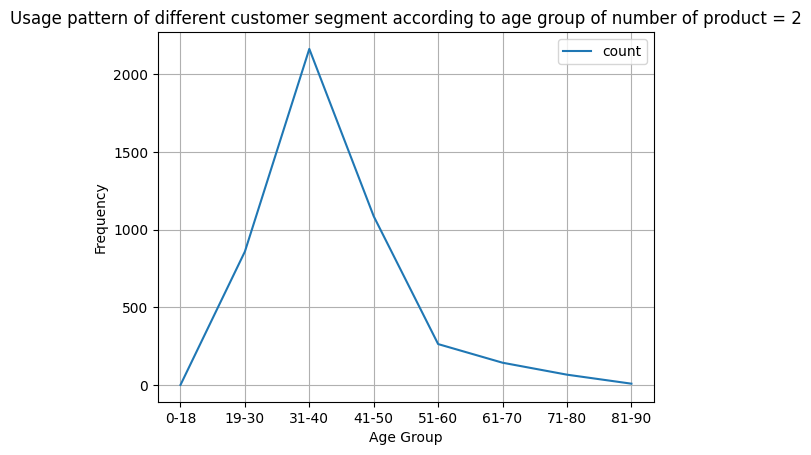

In [27]:
usage2_agewise=p3[p3['NumOfProducts']==2]['Age Group'].value_counts().reset_index().sort_values(by='index')
usage2_agewise.rename(columns={'index':'Age Group','Age Group':'count'},inplace=True)
usage2_agewise.plot(x='Age Group')
plt.ylabel('Frequency')
plt.title('Usage pattern of different customer segment according to age group of number of product = 2')
plt.grid(True)

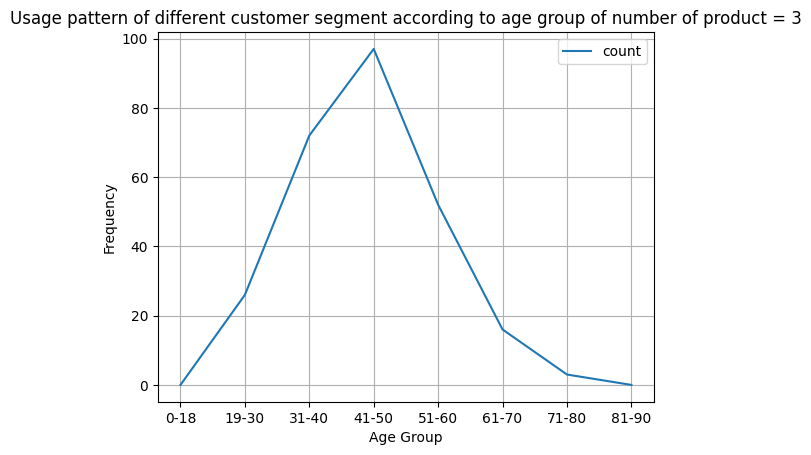

In [28]:
usage3_agewise=p3[p3['NumOfProducts']==3]['Age Group'].value_counts().reset_index().sort_values(by='index')
usage3_agewise.rename(columns={'index':'Age Group','Age Group':'count'},inplace=True)
usage3_agewise.plot(x='Age Group')
plt.ylabel('Frequency')
plt.title('Usage pattern of different customer segment according to age group of number of product = 3')
plt.grid(True)

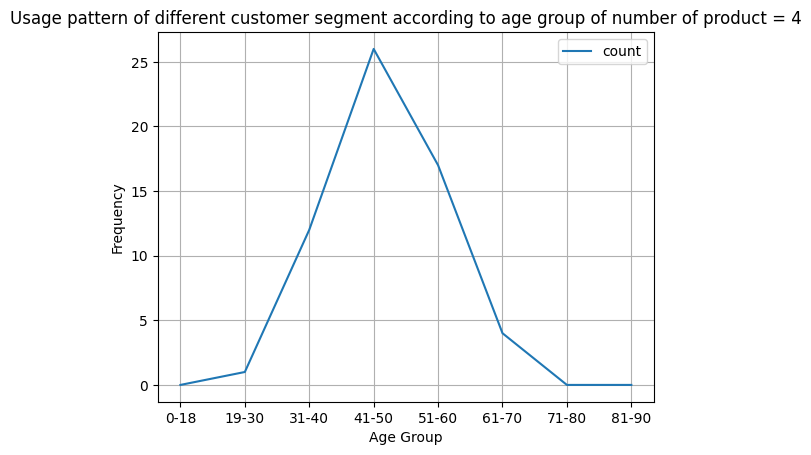

In [29]:
usage4_agewise=p3[p3['NumOfProducts']==4]['Age Group'].value_counts().reset_index().sort_values(by='index')
usage4_agewise.rename(columns={'index':'Age Group','Age Group':'count'},inplace=True)
usage4_agewise.plot(x='Age Group')
plt.ylabel('Frequency')
plt.title('Usage pattern of different customer segment according to age group of number of product = 4')
plt.grid(True)

,Age Group,count
7,0-18,0
2,19-30,755
0,31-40,2098
1,41-50,1409
3,51-60,537
4,61-70,212
5,71-80,67
6,81-90,5


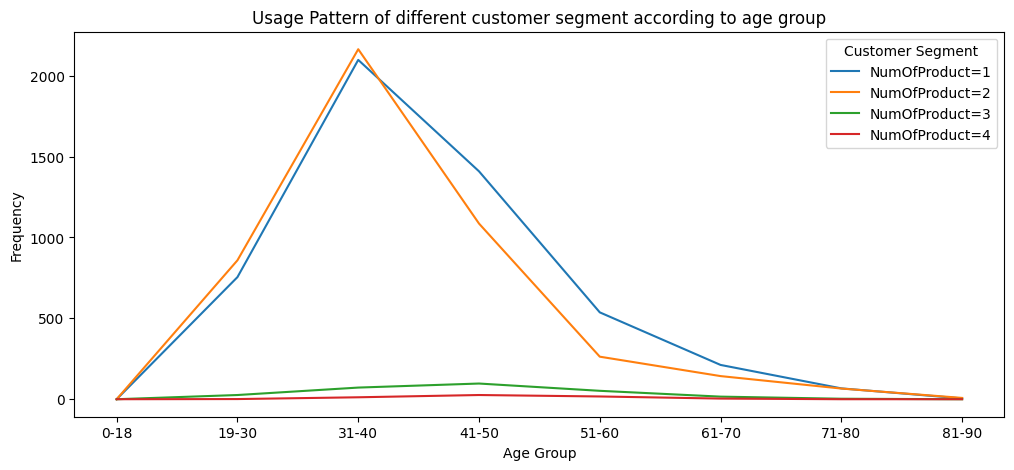

In [30]:
fig, axes=plt.subplots(figsize=(12,5))
axes.plot(usage1_agewise['Age Group'], usage1_agewise['count'], label='NumOfProduct=1')
axes.plot(usage2_agewise['Age Group'], usage2_agewise['count'], label='NumOfProduct=2')
axes.plot(usage3_agewise['Age Group'], usage3_agewise['count'], label='NumOfProduct=3')
axes.plot(usage4_agewise['Age Group'], usage4_agewise['count'], label='NumOfProduct=4')
axes.set_xlabel('Age Group')
axes.set_ylabel('Frequency')
axes.set_title('Usage Pattern of different customer segment according to age group')
axes.legend(title='Customer Segment')
usage1_agewise

## Financial Analysis:

In [31]:
avg_acc_bal=p3['Balance'].mean().round(2)
print(f'Average account Balance of the customers are {avg_acc_bal}')
print(f'''
Churned Customer:
​
Number of customer churned is {p3[p3['churned']==1]['churned'].sum()}
​
Average Credit Score is {p3[p3['churned']==1]['CreditScore'].mean().round()}
Median Credit Score is {p3[p3['churned']==1]['CreditScore'].median()}
Max and Min Credit Score is {p3[p3['churned']==1]['CreditScore'].max()} and {p3[p3['churned']==1]['CreditScore'].min()}
Average Balance is {p3[p3['churned']==1]['Balance'].mean().round()}
Average Tenure is {p3[p3['churned']==1]['Tenure'].mean().round()}
Average Number of Product used is {p3[p3['churned']==1]['NumOfProducts'].mean().round()}
Percentage of customers having credit card is {(p3[p3['churned']==1]['HasCrCard'].sum()/10000)*100}
Number of person who is active member is {p3[p3['churned']==1]['IsActiveMember'].sum()}
Average estimated Salary is {p3[p3['churned']==1]['EstimatedSalary'].mean().round()}
​
Non-Churned Customer:
​
Number of Non-churned customer is {len(p3[p3['churned']==0]['churned'])}
​
Average Credit Score is {p3[p3['churned']==0]['CreditScore'].mean().round()}
Median Credit Score is {p3[p3['churned']==0]['CreditScore'].median()}
Max and Min Credit Score is {p3[p3['churned']==0]['CreditScore'].max()} and {p3[p3['churned']==0]['CreditScore'].min()}
Average Balance is {p3[p3['churned']==0]['Balance'].mean().round()}
Average Tenure is {p3[p3['churned']==0]['Tenure'].mean().round()}
Average Number of Product used is {p3[p3['churned']==0]['NumOfProducts'].mean().round()}
Percentage of customers having credit card is {(p3[p3['churned']==0]['HasCrCard'].sum()/10000)*100}
Number of person who is active member is {p3[p3['churned']==0]['IsActiveMember'].sum()}
Average estimated Salary is {p3[p3['churned']==0]['EstimatedSalary'].mean().round()}
​
''')

Average account Balance of the customers are 76485.89

Churned Customer:
​
Number of customer churned is 2037
​
Average Credit Score is 645.0
Median Credit Score is 646.0
Max and Min Credit Score is 850 and 350
Average Balance is 91109.0
Average Tenure is 5.0
Average Number of Product used is 1.0
Percentage of customers having credit card is 14.24
Number of person who is active member is 735
Average estimated Salary is 101466.0
​
Non-Churned Customer:
​
Number of Non-churned customer is 7963
​
Average Credit Score is 652.0
Median Credit Score is 653.0
Max and Min Credit Score is 850 and 405
Average Balance is 72745.0
Average Tenure is 5.0
Average Number of Product used is 2.0
Percentage of customers having credit card is 56.31
Number of person who is active member is 4416
Average estimated Salary is 99738.0
​



In [32]:
p3['CustomerId'].nunique()

10000

## Predictive Modeling:

In [33]:
col=['CreditScore','Balance','EstimatedSalary']

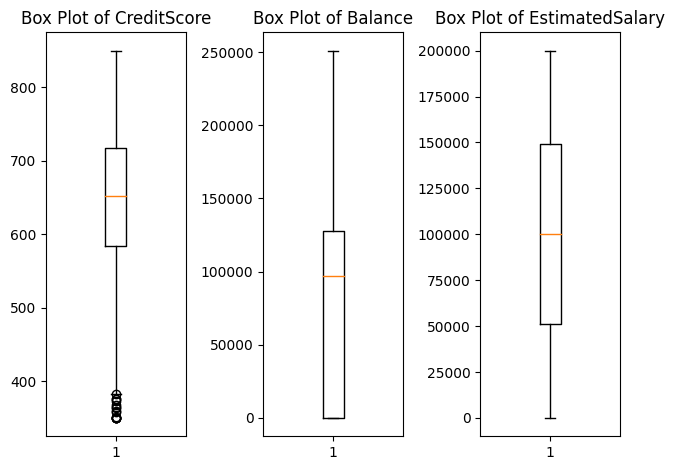

In [34]:
fig, axes=plt.subplots(1,3)
for i, col in enumerate(col):
    axes[i].boxplot(x=col,data=p3)
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [35]:
p3.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned', 'Age Group', 'num'],
      dtype='object')

In [36]:
p3_new=p3.drop(['Surname','Age Group','RowNumber','CustomerId','num'],axis=1)
p3_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
p3_new.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64

In [38]:
cat_feats=['Geography','Gender']
final_p3=pd.get_dummies(p3_new,columns=cat_feats,drop_first=True)
final_p3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
#function of VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [41]:
final_p3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [42]:
a = final_p3.drop(['churned'], axis=1)
a

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [43]:
calc_vif(a)

,variables,VIF
0,CreditScore,21.236445
1,Age,12.334128
2,Tenure,3.872755
3,Balance,3.182267
4,NumOfProducts,7.826417
5,HasCrCard,3.289605
6,IsActiveMember,2.075966
7,EstimatedSalary,3.887186
8,Geography_Germany,1.787170
9,Geography_Spain,1.486247


In [44]:
b=final_p3.drop(['churned','CreditScore'], axis=1)
calc_vif(b)

,variables,VIF
0,Age,9.364299
1,Tenure,3.704045
2,Balance,2.968403
3,NumOfProducts,6.424649
4,HasCrCard,3.167809
5,IsActiveMember,2.052598
6,EstimatedSalary,3.718567
7,Geography_Germany,1.786233
8,Geography_Spain,1.473354
9,Gender_Male,2.125743


In [45]:
final_p3=final_p3.drop(['CreditScore'], axis=1)

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
sm=SMOTE(sampling_strategy='minority', random_state=42)

In [48]:
oversampled_X, oversampled_y=sm.fit_resample(final_p3.drop('churned',axis=1), final_p3['churned'])

In [49]:
pd.DataFrame(oversampled_X)

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.000000,1,1,1,101348.880000,0,0,0
1,41,1,83807.860000,1,0,1,112542.580000,0,1,0
2,42,8,159660.800000,3,1,0,113931.570000,0,0,0
3,39,1,0.000000,2,0,0,93826.630000,0,0,0
4,43,2,125510.820000,1,1,1,79084.100000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
15921,47,5,108732.431561,1,1,0,184555.335538,1,0,0
15922,56,7,127070.846317,1,1,0,51834.800300,1,0,0
15923,32,3,102755.340078,2,0,0,189755.014496,1,0,0
15924,47,5,0.000000,3,1,0,89933.242727,0,0,0


In [50]:
pd.DataFrame(oversampled_y)

,churned
0,1
1,0
2,1
3,0
4,0
...,...
15921,1
15922,1
15923,1
15924,1


In [51]:
oversampled=pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_y)], axis=1)

In [52]:
from sklearn.model_selection import train_test_split
X=oversampled.drop('churned',axis=1)
y=oversampled['churned']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      2662
           1       0.60      0.68      0.64      2594

    accuracy                           0.62      5256
   macro avg       0.62      0.62      0.62      5256
weighted avg       0.62      0.62      0.62      5256

[[1484 1178]
 [ 823 1771]]


In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)

In [56]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2662
           1       0.77      0.81      0.79      2594

    accuracy                           0.79      5256
   macro avg       0.79      0.79      0.79      5256
weighted avg       0.79      0.79      0.79      5256

[[2047  615]
 [ 505 2089]]


In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred1=rfc.predict(X_test)

In [58]:
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2662
           1       0.85      0.85      0.85      2594

    accuracy                           0.85      5256
   macro avg       0.85      0.85      0.85      5256
weighted avg       0.85      0.85      0.85      5256

[[2271  391]
 [ 389 2205]]


In [59]:
from pycaret.classification import *
class_experiment = setup(final_p3, 
                       target = 'churned', 
                       session_id=42, 
                       experiment_name='customer churn model',
                       normalize = True, 
                       transformation = True, 
                       remove_multicollinearity = True, #drop one of the two features that are highly correlated with each other
                       multicollinearity_threshold = 0.5
                           )

,Description,Value
0,Session id,42
1,Target,churned
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(10000, 11)"
5,Transformed train set shape,"(7000, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [60]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8591,0.8575,0.4761,0.7419,0.5787,0.4991,0.5175,2.2810
gbc,Gradient Boosting Classifier,0.8584,0.8609,0.4488,0.7576,0.5621,0.4846,0.5089,0.5630
rf,Random Forest Classifier,0.8554,0.8425,0.4621,0.7318,0.5654,0.4840,0.5030,0.3780
lightgbm,Light Gradient Boosting Machine,0.8537,0.8506,0.4733,0.7138,0.5681,0.4845,0.4999,0.2540
ada,Ada Boost Classifier,0.8513,0.8374,0.4445,0.7170,0.5474,0.4647,0.4843,0.1910
et,Extra Trees Classifier,0.8467,0.8316,0.4453,0.6941,0.5419,0.4551,0.4716,0.3870
xgboost,Extreme Gradient Boosting,0.8441,0.8329,0.4782,0.6643,0.5552,0.4639,0.4736,0.1360
qda,Quadratic Discriminant Analysis,0.8199,0.7959,0.3934,0.5872,0.4709,0.3674,0.3783,0.0700
lr,Logistic Regression,0.8171,0.7649,0.2202,0.6514,0.3286,0.2519,0.3020,1.2190
lda,Linear Discriminant Analysis,0.8140,0.7646,0.2196,0.6221,0.3237,0.2440,0.2889,0.0700


In [61]:
#max
#Gradient Boosting Classifier(gbc)=acc(0.8616),auc(0.8593),prec(0.7768),f1(0.5685),kappa(0.4934),mcc(0.5202)
#dt=recall(0.4887)

In [62]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8443,0.8244,0.4014,0.7037,0.5112,0.4267,0.4505
1,0.8729,0.8379,0.5141,0.7849,0.6213,0.5488,0.5666
2,0.8514,0.8298,0.4296,0.7262,0.5398,0.4581,0.4806
3,0.8514,0.8535,0.4437,0.7159,0.5478,0.4647,0.4838
4,0.8500,0.8458,0.4615,0.7021,0.5570,0.4713,0.4863
5,0.8429,0.8443,0.4895,0.6542,0.5600,0.4668,0.4740
6,0.8500,0.8292,0.4895,0.6863,0.5714,0.4836,0.4937
7,0.8571,0.8433,0.4615,0.7416,0.5690,0.4888,0.5086
8,0.8686,0.8536,0.4825,0.7931,0.6000,0.5269,0.5502


In [63]:
rf=tune_model(rf,optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8003,0.6549,0.4247,0.5152,0.3570,0.3722
1,0.7543,0.8184,0.6901,0.4336,0.5326,0.3775,0.3963
2,0.7514,0.7975,0.6268,0.4238,0.5057,0.3478,0.3597
3,0.7900,0.8560,0.7676,0.4888,0.5973,0.4645,0.4862
4,0.7686,0.8290,0.7343,0.4585,0.5645,0.4182,0.4397
5,0.7343,0.8268,0.7273,0.4143,0.5279,0.3618,0.3895
6,0.7643,0.8165,0.7343,0.4526,0.5600,0.4112,0.4336
7,0.7814,0.8307,0.6993,0.4762,0.5666,0.4274,0.4415
8,0.7757,0.8385,0.7273,0.4685,0.5699,0.4276,0.4465


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


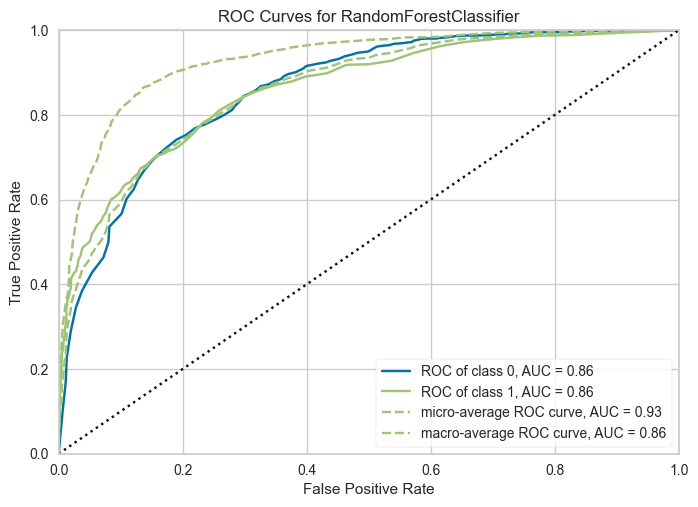

In [64]:
plot_model(rf)

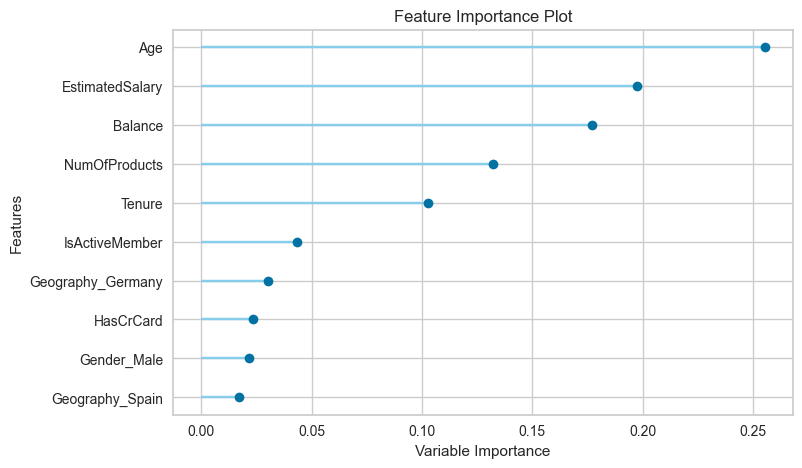

In [65]:
plot_model(rf,plot='feature')

In [66]:
print(evaluate_model(rf))

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

None


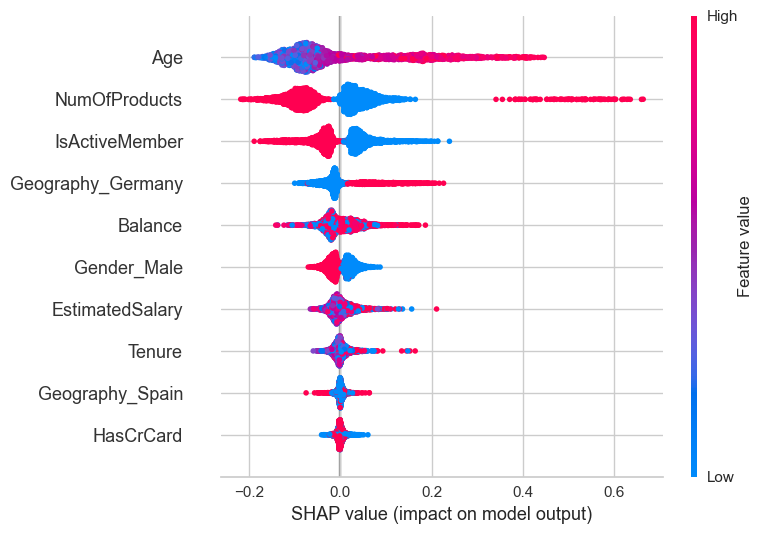

In [67]:
interpret_model(rf)